# Analyse des données sur les matchs de Ligue 1

In [2]:
#on import les bibliothèques qui nious serons utilses 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# on importe toutes les données et on les ranges dans un dictionnaire tout en enlevant les données inutiles
#on va aussi transformer les lettres H, D, A en 2,1,0
#cellule à ne faire tourner qu'une fois
DF = {}
for i in range(2007,2021) : #entre 2005 et 2021
    dataFrame = pd.read_csv("DataSets/" + str(i) + "_" + str(i+1) + ".csv") 
    indexB365H = list(dataFrame.columns).index("B365H") # Index de la première colone à supprimer. On transforme en liste car on .index() ne s'applique pas au Index. 
    for c in range(indexB365H,len(dataFrame.columns)) : 
        dataFrame = dataFrame.drop(columns=[dataFrame.columns[len(dataFrame.columns)-1]],axis=1)
    
    #pour transformer les lettres pour le full time result
    dataFrame.loc[dataFrame['FTR'] == 'H',['FTR']] = float(2.0)
    dataFrame.loc[dataFrame['FTR'] == 'D',['FTR']] = float(1.0)
    dataFrame.loc[dataFrame['FTR'] == 'A',['FTR']] = float(0.0)
    
    #pour transformer les lettres pour le halftime result
    dataFrame.loc[dataFrame['HTR'] == 'H',['HTR']] = float(2.0)
    dataFrame.loc[dataFrame['HTR'] == 'D',['HTR']] = float(1.0)
    dataFrame.loc[dataFrame['HTR'] == 'A',['HTR']] = float(0.0)
    
    dataFrame.to_csv('PoubelleAux/'+str(i) + "_" + str(i+1) +".csv") # pour regler le problème de type des colonnes FTR et HTR
    df = pd.read_csv('PoubelleAux/'+str(i) + "_" + str(i+1) +".csv")
    df = df.drop(columns = ['Unnamed: 0'])
    DF[str(i) + "_" + str(i+1)] = df
    print("nombre de colonnes saisons ", i,"/",i+1, ":", len(dataFrame.columns))



nombre de colonnes saisons  2007 / 2008 : 22
nombre de colonnes saisons  2008 / 2009 : 22
nombre de colonnes saisons  2009 / 2010 : 22
nombre de colonnes saisons  2010 / 2011 : 22
nombre de colonnes saisons  2011 / 2012 : 22
nombre de colonnes saisons  2012 / 2013 : 22
nombre de colonnes saisons  2013 / 2014 : 22
nombre de colonnes saisons  2014 / 2015 : 22
nombre de colonnes saisons  2015 / 2016 : 22
nombre de colonnes saisons  2016 / 2017 : 22
nombre de colonnes saisons  2017 / 2018 : 22
nombre de colonnes saisons  2018 / 2019 : 22
nombre de colonnes saisons  2019 / 2020 : 23
nombre de colonnes saisons  2020 / 2021 : 23


# Définition des colonnes des tableaux

|Nom de la colonne|signification|
|--------|--------|
|Div | League Division|
|Date | Match Date (dd/mm/yy)|
|Time | Time of match kick off|
|HomeTeam | Home Team|
|AwayTeam | Away Team|
|FTHG and HG | Full Time Home Team Goals|
|FTAG and AG | Full Time Away Team Goals|
|FTR and Res | Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG | Half Time Home Team Goals|
|HTAG | Half Time Away Team Goals|
|HTR |Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|HS | Home Team Shots|
|AS | Away Team Shots|
|HST | Home Team Shots on Target|
|AST | Away Team Shots on Target|
|HHW | Home Team Hit Woodwork|
|AHW | Away Team Hit Woodwork|
|HC | Home Team Corners|
|AC | Away Team Corners|
|HF | Home Team Fouls Committed|
|AF | Away Team Fouls Committed|
|HY | Home Team Yellow Cards|
|AY | Away Team Yellow Cards|
|HR | Home Team Red Cards|
|AR | Away Team Red Cards|


## Analyse des données

In [9]:
def plot_corr(corr): #fonction pour tracer les corrélations entre les variables
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)


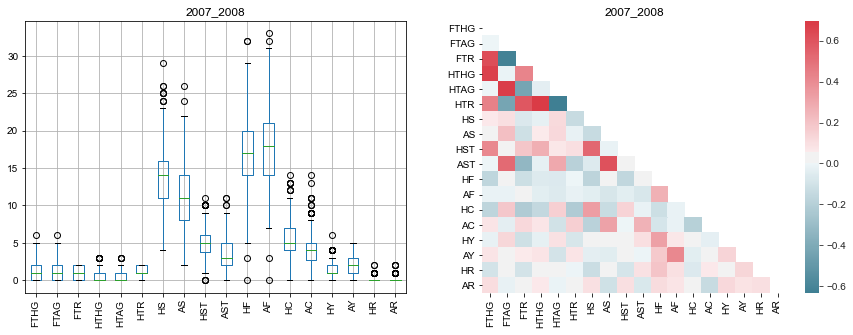

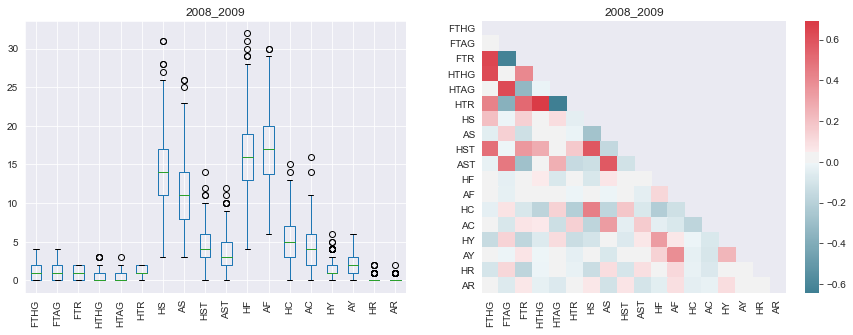

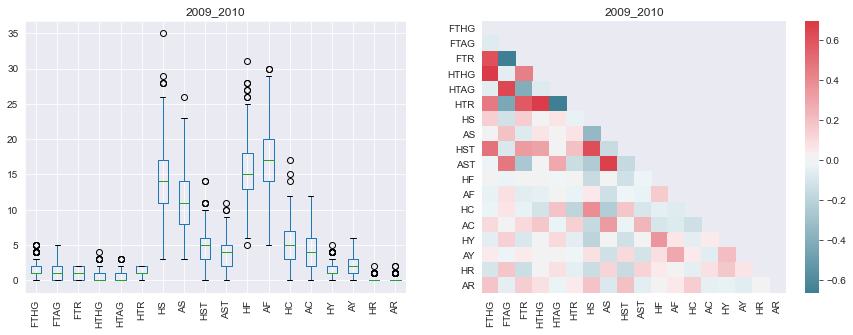

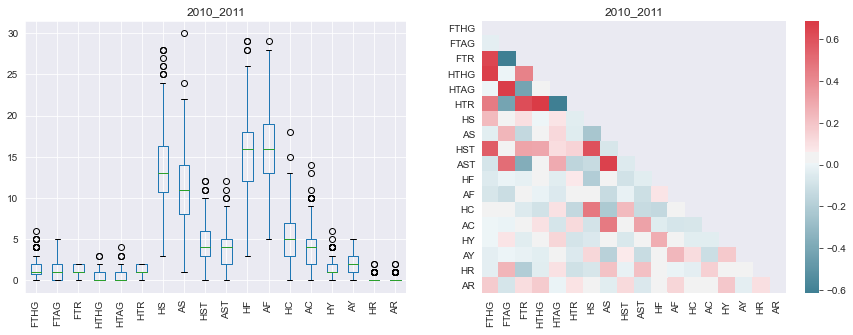

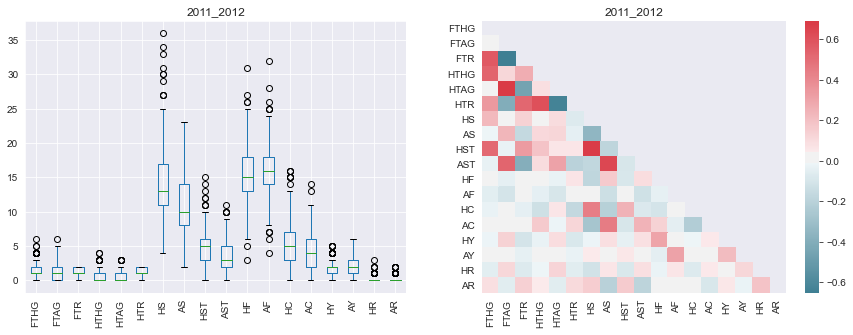

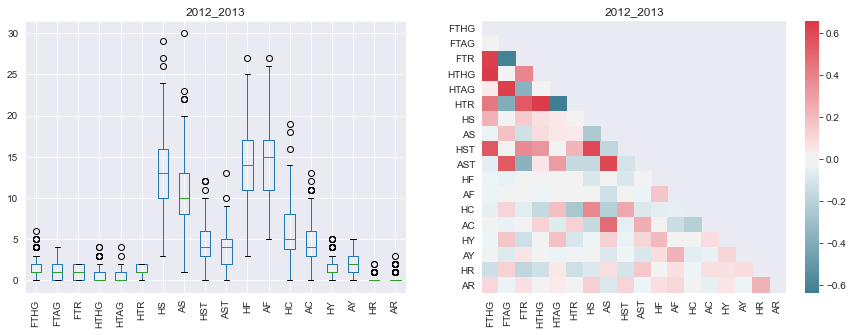

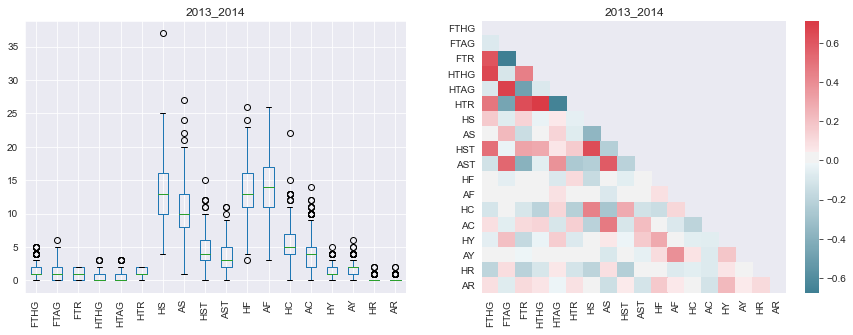

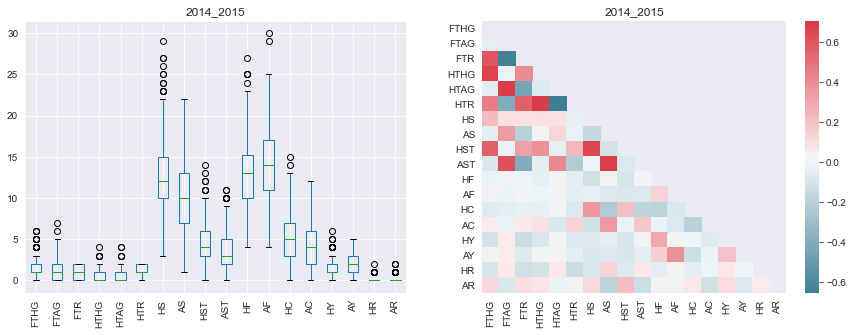

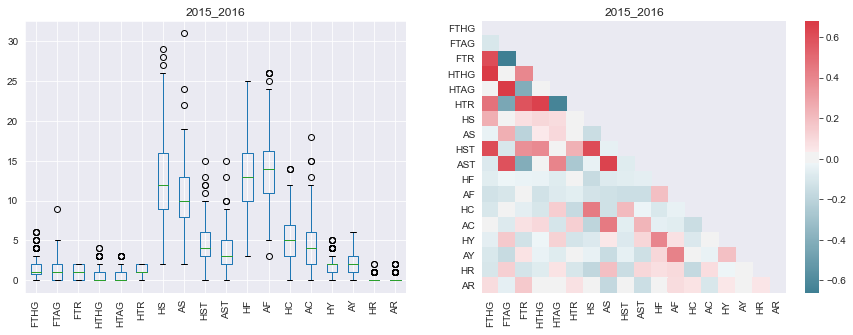

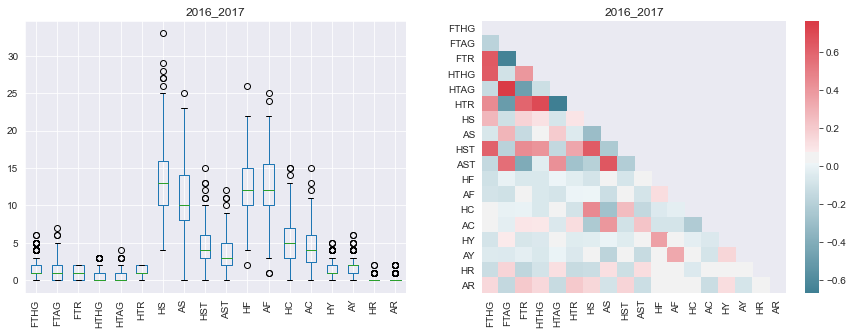

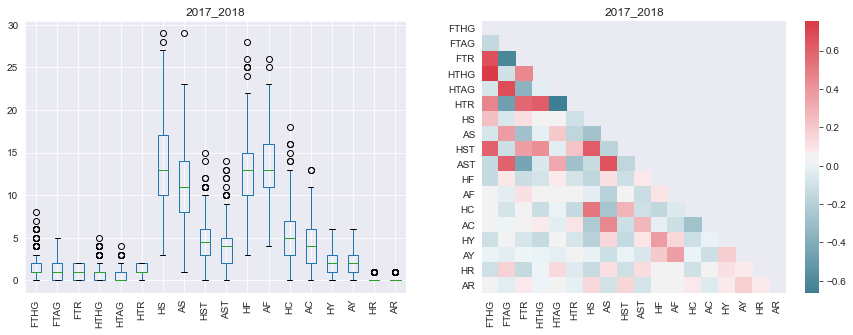

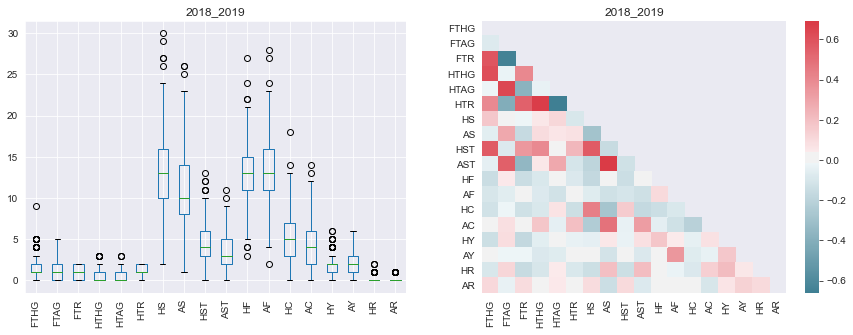

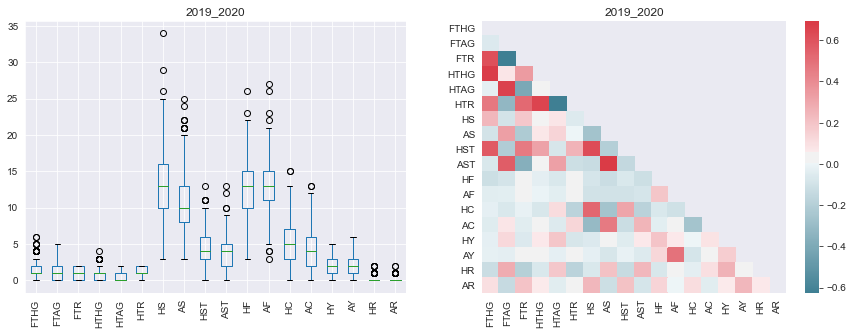

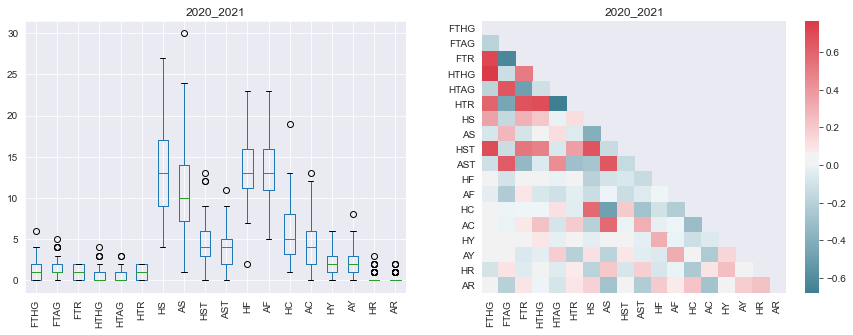

In [10]:
i=1 #index figure
for key in DF :
    plt.figure(i,figsize=(15,5))
    plt.subplot(121)
    DF[key].boxplot()
    plt.xticks(rotation='vertical')
    plt.title(key)

    plt.subplot(122)
    sns.set_style('darkgrid')
    plt.rc('figure', figsize=[8, 6])
    plt.xticks(rotation='vertical')
    corr = DF[key].corr()
    plot_corr(corr)
    plt.title(key)
    
    i += 1 #pour changer de figure
    plt.show()

### 1)Nombre moyen de but

In [11]:
seasons = []
HomeGoals = []
AwayGoals = []
for key in DF : 
    seasons.append(key)
    HomeGoals.append(DF[key].describe()['FTHG']['mean']) #pour récuperer le nombre de but moyen marqué par l'équipe à domicile
    AwayGoals.append(DF[key].describe()['FTAG']['mean'])#pour récuperer le nombre de but moyen marqué par l'équipe à l'exterieur

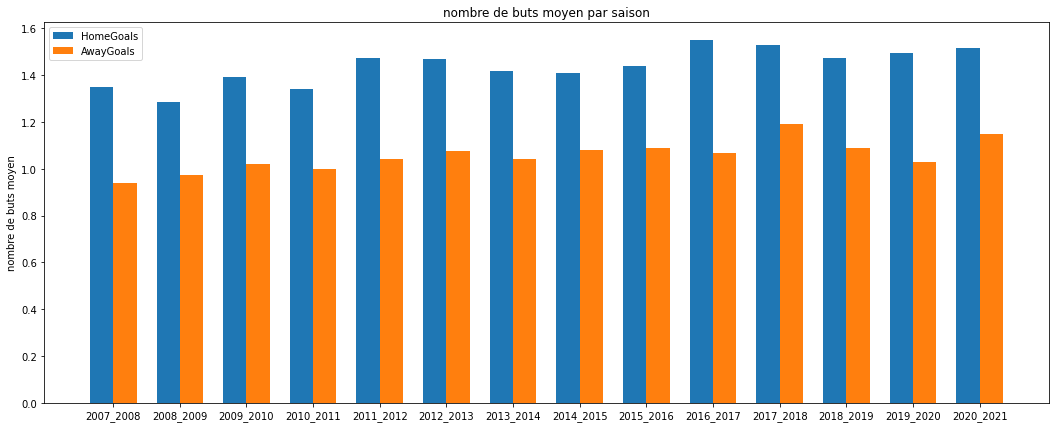

In [7]:
#tracé des graphes
x=np.arange(len(seasons))
width=0.35

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(x-width/2, HomeGoals, width, label="HomeGoals")
rects2 = ax.bar(x+width/2,AwayGoals, width, label="AwayGoals")

ax.set_ylabel('nombre de buts moyen')
ax.set_title('nombre de buts moyen par saison')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()

### 2)Nombre moyen de tir

In [4]:
HomeShoots = []
AwayShoots = []
for key in DF : 
    HomeShoots.append(DF[key].describe()['HS']['mean'])
    AwayShoots.append(DF[key].describe()['AS']['mean'])

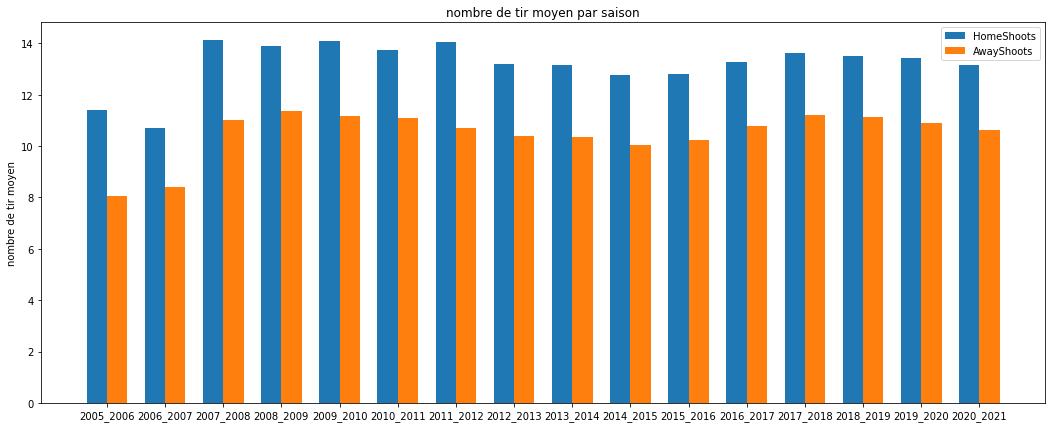

In [6]:
#tracé des graphes
x=np.arange(len(seasons))
width=0.35

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(x-width/2, HomeShoots, width, label="HomeShoots")
rects2 = ax.bar(x+width/2,AwayShoots, width, label="AwayShoots")

ax.set_ylabel('nombre de tir moyen')
ax.set_title('nombre de tir moyen par saison')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()

### Nombre moyen de carton rouge et jaune

In [9]:
HomeYellowCards = []
AwayYellowCards = []
HomeRedCards = []
AwayRedCards = []
for key in DF : 
    HomeYellowCards.append(DF[key].describe()['HY']['mean'])
    AwayYellowCards.append(DF[key].describe()['AY']['mean'])
    HomeRedCards.append(DF[key].describe()['HR']['mean']) 
    AwayRedCards.append(DF[key].describe()['AR']['mean'])

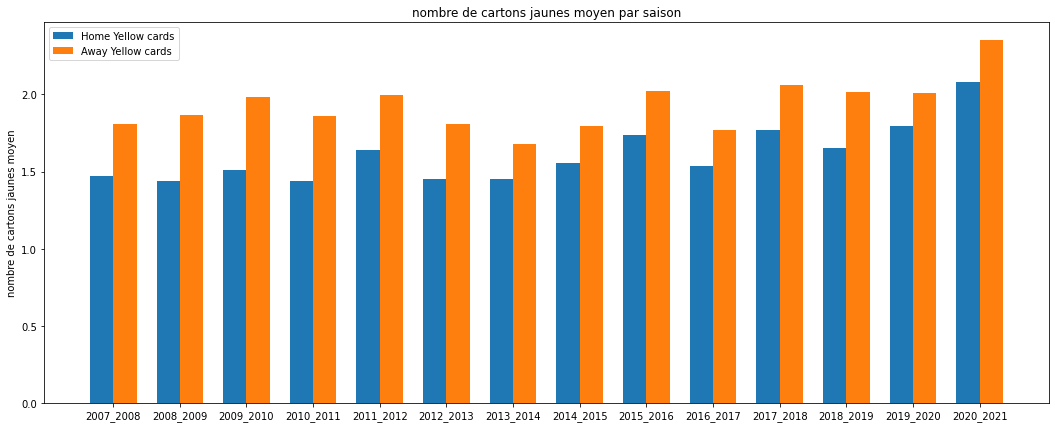

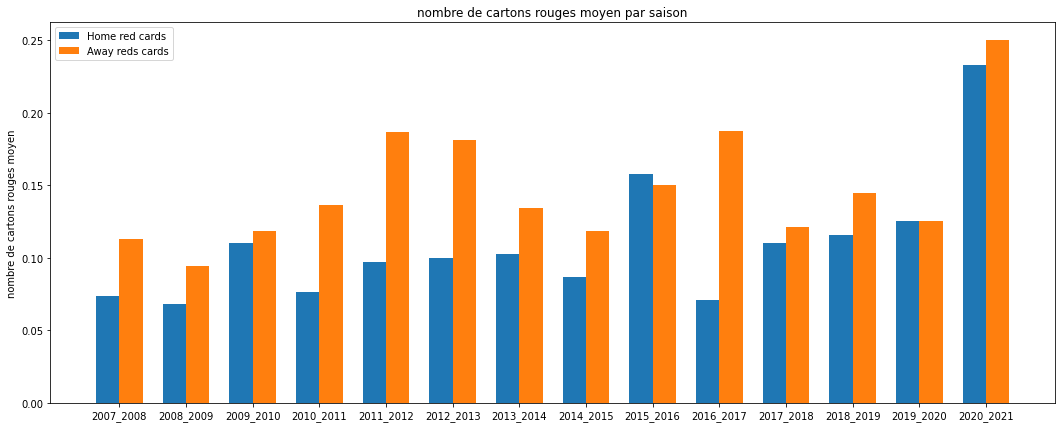

In [10]:
#tracé des graphes
x=np.arange(len(seasons))
width=0.35

fig1, ax1 = plt.subplots(figsize=(18,7))
rects11 = ax1.bar(x-width/2, HomeYellowCards, width, label="Home Yellow cards")
rects21 = ax1.bar(x+width/2,AwayYellowCards, width, label="Away Yellow cards")

ax1.set_ylabel('nombre de cartons jaunes moyen')
ax1.set_title('nombre de cartons jaunes moyen par saison')
ax1.set_xticks(x)
ax1.set_xticklabels(seasons)
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(18,7))
rects21 = ax2.bar(x-width/2, HomeRedCards, width, label="Home red cards")
rects22 = ax2.bar(x+width/2,AwayRedCards, width, label="Away reds cards")

ax2.set_ylabel('nombre de cartons rouges moyen')
ax2.set_title('nombre de cartons rouges moyen par saison')
ax2.set_xticks(x)
ax2.set_xticklabels(seasons)
ax2.legend()

plt.show()

## Nouveau dataset

Mainteant que nous avons analysé les données il va falloir créer un nouveau dataset qui va nous permettre de de réaliser un algo pour anticiper le résultat d'un match

Tout d'abbord il nous faut des caractéristiques sur le match. Les key values seront :  les deux équipes, la division, la date et l'heure si jamais elle est présente.  
Ensuite des caractéristiques sur les matchs précédents vont permettre de définir la dynamique des équipes. Par exemple : le nombre de victoire, le nombre de défaite, le nombre d'égalité, le nombre de tir, le nombre de tir cadré pour les équipes à domicile et à l'exterieur depuis le début de la saison, le nombre de fautes et de cartons depuis le début de la saison.  
Il serait peut être interressant de regarder seulement les 5-6 derniers matchs pour la dynamique.  
Il serait peut être plus interressant d'utiliser des moyennes plutot que des buts totaux.  
**Ce code ne marche que à partir de 2007/2008 car les datasets des saisons précédentes n'ont pas toutes les variables nécéssaires.**  
Saison 2005/2006, il manque les corners et les fautes.  
Saison 2006/2007, Il manque les fautes.

In [13]:
DF_means ={}
for key in DF : 
    season = key
    df = DF[season]
    new_df = df.copy()
    
    #On initialise les listes qui vont comprendre les différentes valeurs pour chaque match et pour chaque équipe
    #on les met dans des listes pour créer les colonnes à la fin
    HomeTeamShootslist = []
    HomeTeamShootOnTargetlist = []
    HomeTeamWinlist = []
    HomeTeamDrawlist = []
    HomeTeamLooselist = []
    HomeTeamFoulslist = []
    HomeTeamYellowCardslist = []
    HomeTeamRedCardslist = []
    HomeTeamGoalslist = []
    AwayTeamShootslist = []
    AwayTeamShootOnTargetlist = []
    AwayTeamWinlist = []
    AwayTeamDrawlist = []
    AwayTeamLooselist = []
    AwayTeamFoulslist = []
    AwayTeamYellowCardslist = []
    AwayTeamRedCardslist = []
    AwayTeamGoalslist = []
        
    for i in range(len(new_df)): #on va balayer tout le dataset pour modifier tous les matchs
        Match = new_df.iloc[i] #on enregistre la ligne
        previousMatchDf = new_df.iloc[0:i] #on enregistre tous les match effectué précédemment
        HomeTeam = Match["HomeTeam"] #on enregistre l'équipe domicile et exterieur
        AwayTeam = Match["AwayTeam"]
        HomeTeamMatch = previousMatchDf.loc[(previousMatchDf["HomeTeam"] == HomeTeam) | (previousMatchDf["AwayTeam"] == HomeTeam)] #on enregistre les matchs effectués par l'équipe à domicile et l'équipe à l'exterieur
        AwayTeamMatch = previousMatchDf.loc[(previousMatchDf["HomeTeam"] == AwayTeam) | (previousMatchDf["AwayTeam"] == AwayTeam)]
    
        #Nombre de match effectué par les équipes
        MatchMadeHT = len(HomeTeamMatch)
        MatchMadeAT = len(AwayTeamMatch)
        
        #boucle pour étudier les données de l'équipe à domicile. On a des v araibles moyennes en générales
        HomeTeamGoals = 0
        HomeTeamShoots = 0
        HomeTeamShootOnTarget = 0
        HomeTeamWin = 0
        HomeTeamDraw =0
        HomeTeamLoose = 0
        HomeTeamFouls = 0
        HomeTeamYellowCards = 0
        HomeTeamRedCards = 0
        
        for index, row in HomeTeamMatch.iterrows(): #pour tous les matchs précédent à domicile ou à l'exterieur de l'équipe HomeTeam
            if(row["HomeTeam"] == HomeTeam): # Match à domicile de HomeTeam
                HomeTeamGoals += row["FTHG"]/MatchMadeHT #on incrémente les différentes variables
                HomeTeamShoots += row['HS']/MatchMadeHT
                HomeTeamShootOnTarget += row['HST']/MatchMadeHT
                HomeTeamFouls += row['HF']/MatchMadeHT
                HomeTeamYellowCards += row['HY']/MatchMadeHT
                HomeTeamRedCards += row['HR']/MatchMadeHT
                if(row['FTR']==2): #on cherche si elle a gagné perdu ou fait égalité
                    HomeTeamWin += 1
                if(row['FTR'] ==1):
                    HomeTeamDraw += 1
                if(row['FTR']==0): 
                    HomeTeamLoose +=1
                    
            if(row["AwayTeam"] == HomeTeam) : #Match à l'exterieur de HomeTeam
                HomeTeamGoals += row["FTAG"]/MatchMadeHT #on incrémente les différentes varaibles
                HomeTeamShoots += row['AS']/MatchMadeHT
                HomeTeamShootOnTarget += row['AST']/MatchMadeHT
                HomeTeamFouls += row['AF']/MatchMadeHT
                HomeTeamYellowCards += row['AY']/MatchMadeHT
                HomeTeamRedCards += row['AR']/MatchMadeHT
                if(row['FTR']==0):#on cherche si elle a gagné perdu ou fait égalité
                    HomeTeamWin += 1
                if(row['FTR'] == 1):
                    HomeTeamDraw += 1
                if(row['FTR']==2): 
                    HomeTeamLoose +=1
        
        
        
        #boucle chercher données de l'équipe à l'exterieur
        AwayTeamGoals = 0
        AwayTeamShoots = 0
        AwayTeamWin = 0
        AwayTeamDraw = 0
        AwayTeamLoose = 0
        AwayTeamShootOnTarget = 0
        AwayTeamFouls = 0
        AwayTeamYellowCards = 0
        AwayTeamRedCards = 0
        
        for index, row in AwayTeamMatch.iterrows():  #pour tous les matchs précédent à domicile ou à l'exterieur de l'équipe AwayTeam
            if(row["HomeTeam"] == AwayTeam): #Match à domicile de AwayTeam
                AwayTeamGoals += row["FTHG"]/MatchMadeAT#on incrémente les différentes varaibles
                AwayTeamShoots += row["HS"]/MatchMadeAT
                AwayTeamShootOnTarget += row['HST']/MatchMadeAT
                AwayTeamFouls += row['HF']/MatchMadeAT
                AwayTeamYellowCards += row['HY']/MatchMadeAT
                AwayTeamRedCards += row['HR']/MatchMadeAT
                if(row['FTR']==2): #on cherche si elle a gagné perdu ou fait égalité
                    AwayTeamWin += 1
                if(row['FTR'] == 1):
                    AwayTeamDraw += 1
                if(row['FTR']==0): 
                    AwayTeamLoose +=1
                
            if(row["AwayTeam"] == AwayTeam): #Match à l'exterieur de AwayTeam
                AwayTeamGoals += row["FTAG"]/MatchMadeAT#on incrémente les différentes varaibles
                AwayTeamShoots += row["AS"]/MatchMadeAT
                AwayTeamShootOnTarget += row['AST']/MatchMadeAT
                AwayTeamFouls += row['AF']/MatchMadeAT
                AwayTeamYellowCards += row['AY']/MatchMadeAT
                AwayTeamRedCards += row['AR']
                if(row['FTR']==0):#on cherche si elle a gagné perdu ou fait égalité
                    AwayTeamWin += 1
                if(row['FTR'] == 1):
                    AwayTeamDraw += 1
                if(row['FTR']==2) : 
                    AwayTeamLoose +=1
                    
        #on rajoute les variables aux différentes listes            
        HomeTeamShootslist.append(HomeTeamShoots)
        HomeTeamShootOnTargetlist.append(HomeTeamShootOnTarget)
        HomeTeamWinlist.append(HomeTeamWin)
        HomeTeamDrawlist.append(HomeTeamDraw)
        HomeTeamLooselist.append(HomeTeamLoose)
        HomeTeamFoulslist.append(HomeTeamFouls)
        HomeTeamYellowCardslist.append(HomeTeamYellowCards)
        HomeTeamRedCardslist.append(HomeTeamRedCards) 
        HomeTeamGoalslist.append(HomeTeamGoals)
        AwayTeamShootslist.append(AwayTeamShoots)
        AwayTeamShootOnTargetlist.append(AwayTeamShootOnTarget)
        AwayTeamWinlist.append(AwayTeamWin)
        AwayTeamDrawlist.append(AwayTeamDraw)
        AwayTeamLooselist.append(AwayTeamLoose)
        AwayTeamFoulslist.append(AwayTeamFouls)
        AwayTeamYellowCardslist.append(AwayTeamYellowCards)
        AwayTeamRedCardslist.append(AwayTeamRedCards)
        AwayTeamGoalslist.append(AwayTeamGoals)
    
    print(new_df.columns)
    #On va maintenant enlever les données qui ne serve pas
    indexFTHG = list(new_df.columns).index("FTHG") # Index de la première colone à supprimer. On transforme en liste car on .index() ne s'applique pas au Index.
    dropIndex = indexFTHG #index pour supprimer les colonnes inutiles. 
    for c in range(indexFTHG,len(new_df.columns)): #on enlève toutes les dernières colonnes
        if(new_df.columns[dropIndex]!='FTR'):
            new_df = new_df.drop(new_df.columns[dropIndex],axis=1)
        else :
            dropIndex +=1
    
    #On va maintenant rajouter les colonnes à notre dataset
    new_df['HTS'] = HomeTeamShootslist
    new_df['HTST'] = HomeTeamShootOnTargetlist
    new_df['HTW'] = HomeTeamWinlist
    new_df['HTD'] = HomeTeamDrawlist
    new_df['HTL'] = HomeTeamLooselist
    new_df['HTF'] = HomeTeamFoulslist
    new_df['HTY'] = HomeTeamYellowCardslist
    new_df['HTR'] = HomeTeamRedCardslist
    new_df['HTG'] = HomeTeamGoalslist
    new_df['ATS'] = AwayTeamShootslist
    new_df['ATST'] = AwayTeamShootOnTargetlist
    new_df['ATW'] = AwayTeamWinlist
    new_df['ATD'] = AwayTeamDrawlist
    new_df['ATL'] = AwayTeamLooselist
    new_df['ATF'] = AwayTeamFoulslist
    new_df['ATY'] = AwayTeamYellowCardslist
    new_df['ATR'] = AwayTeamRedCardslist
    new_df['ATG'] = AwayTeamGoalslist
    #new_df.to_csv("cleanedDataset/"+key+".csv")
    DF_means[key] = new_df

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      d

On trace à nouveau les boxplots et les corrélations avec notre nouveau dataset

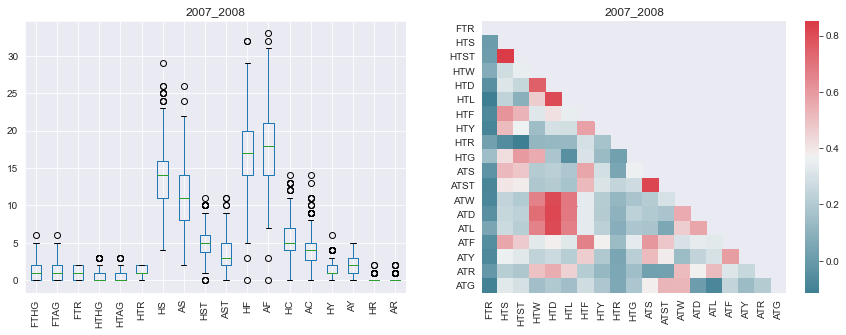

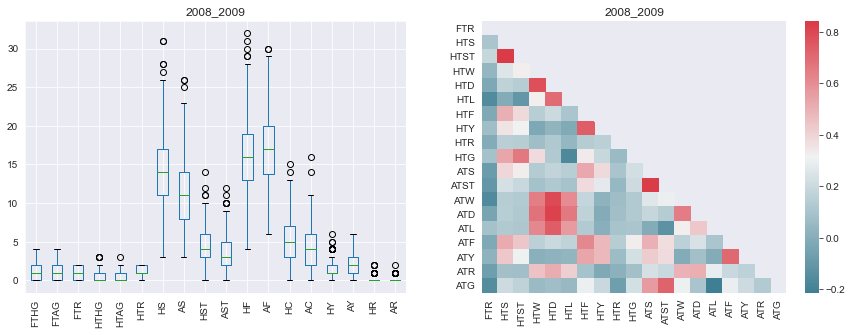

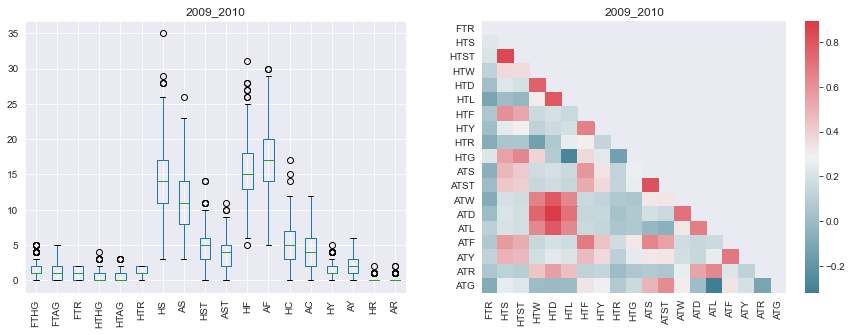

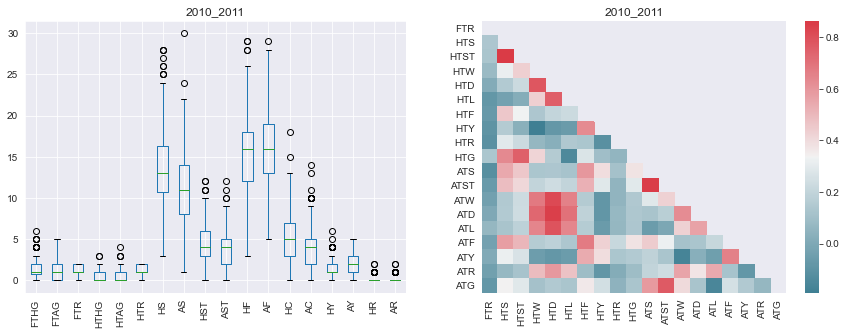

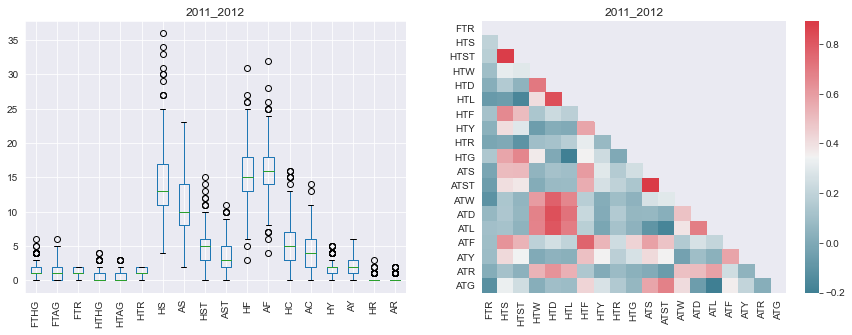

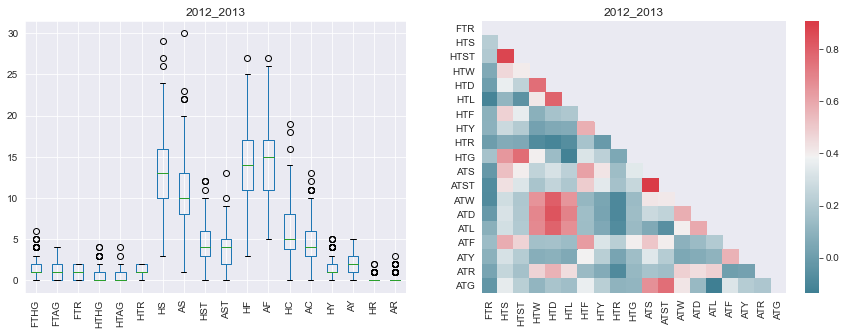

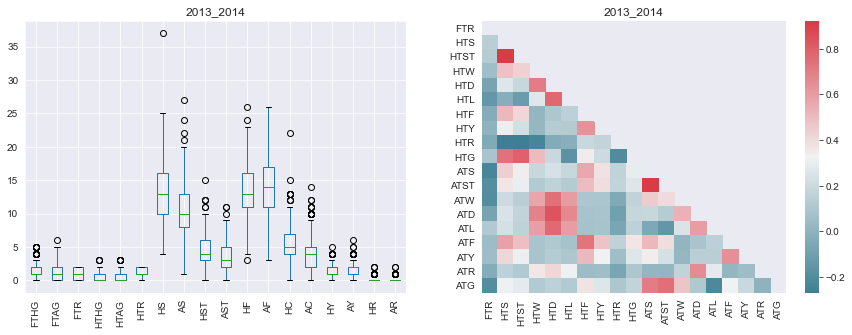

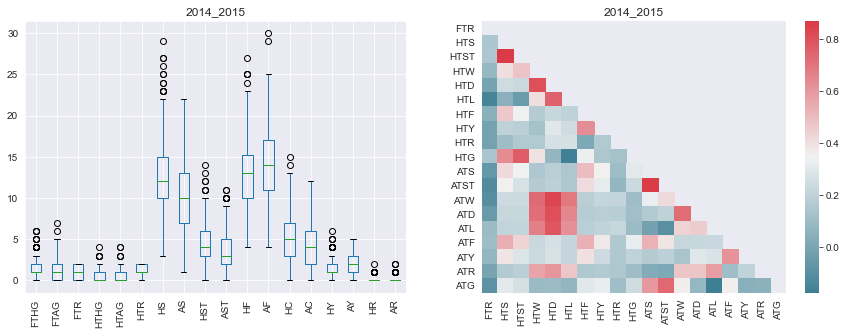

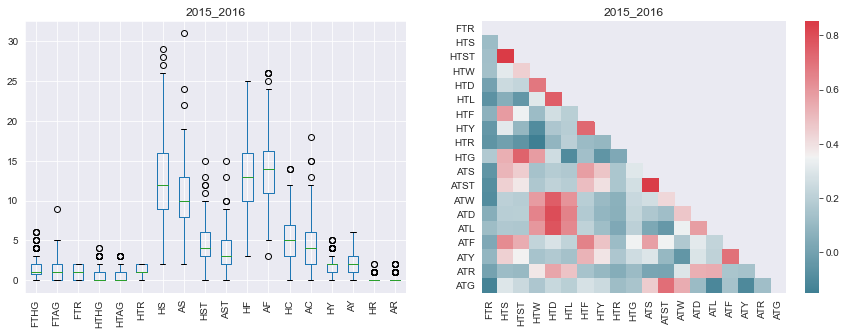

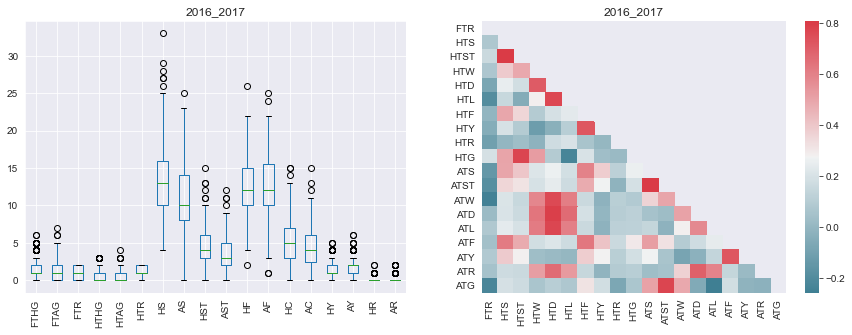

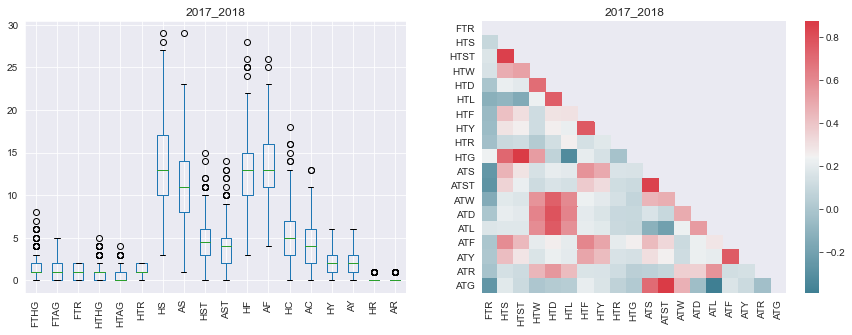

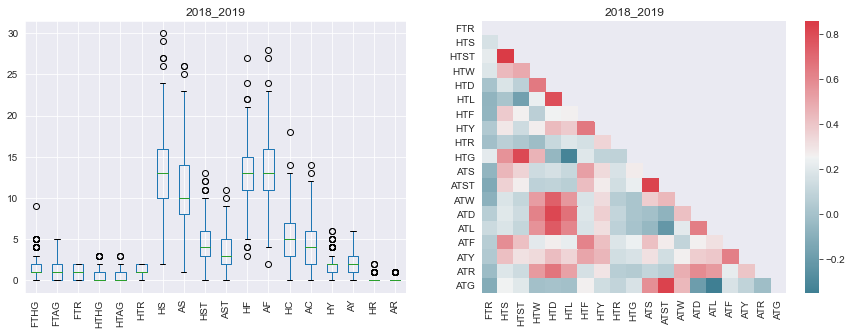

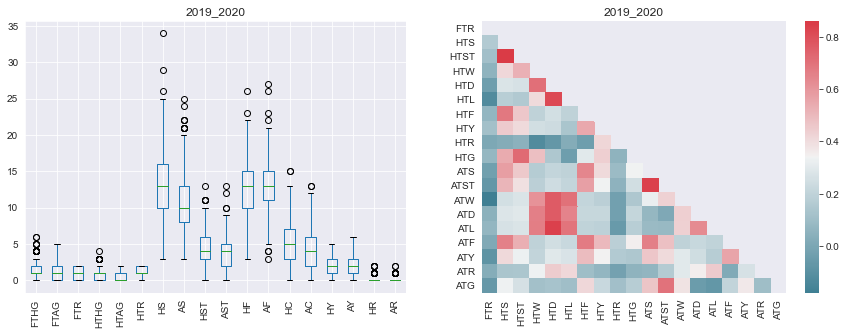

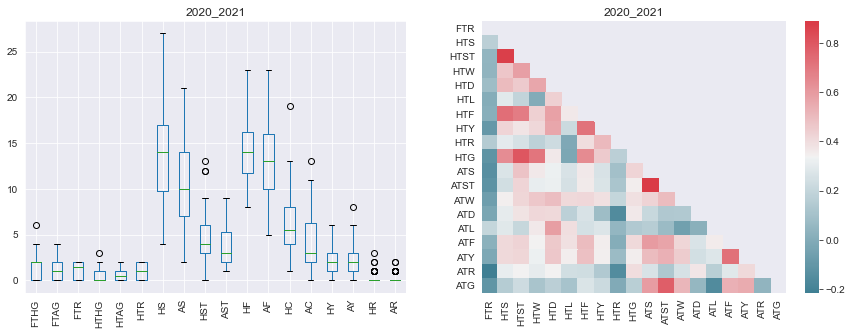

In [8]:
i=1 #index figure
for key in DF_means :
    plt.figure(i,figsize=(15,5))
    plt.subplot(121)
    DF[key].boxplot()
    plt.xticks(rotation='vertical')
    plt.title(key)

    plt.subplot(122)
    sns.set_style('darkgrid')
    plt.rc('figure', figsize=[8, 6])
    plt.xticks(rotation='vertical')
    corr = DF_means[key].corr()
    plot_corr(corr)
    plt.title(key)
    
    i += 1 #pour changer de figure
    plt.show()

Si on veut prendre en compte l'équipe on doit modifier le dataset et donner à chaque équipe un index.   
Le code pour modifier le dataset est le suivante

In [ ]:
id_team = {}
liste_des_clubs = []
for i in range(len(df)):
    if df['HomeTeam'][i] not in liste_des_clubs:
        liste_des_clubs.append(df['HomeTeam'][i])
    if df['AwayTeam'][i] not in liste_des_clubs:
        liste_des_clubs.append(df['AwayTeam'][i])

for i in range(len(liste_des_clubs)):
    id_team[liste_des_clubs[i]]=i+1

name_by_id={}
for keys in id_team.keys():
    name_by_id[id_team[keys]]=keys
#%% modification du dataset pour ne plus avoir de str
def nom_vers_num(dataset):
    for i in range(len(df)):
        df['HomeTeam'][i]=id_team[df['HomeTeam'][i]]
        df['AwayTeam'][i]=id_team[df['AwayTeam'][i]]

In [8]:
df = pd.read_csv("MixingFeatures/DatasetsFeatures/2018_2019_features.csv")
df = df.drop(columns = ['Unnamed: 0',"Away attendance","Home attendance"])  # on enlève aussi les colonnes du public car elles ne sont pas normalisées et n'apporte pas quelque chose à l'étude des corrélations

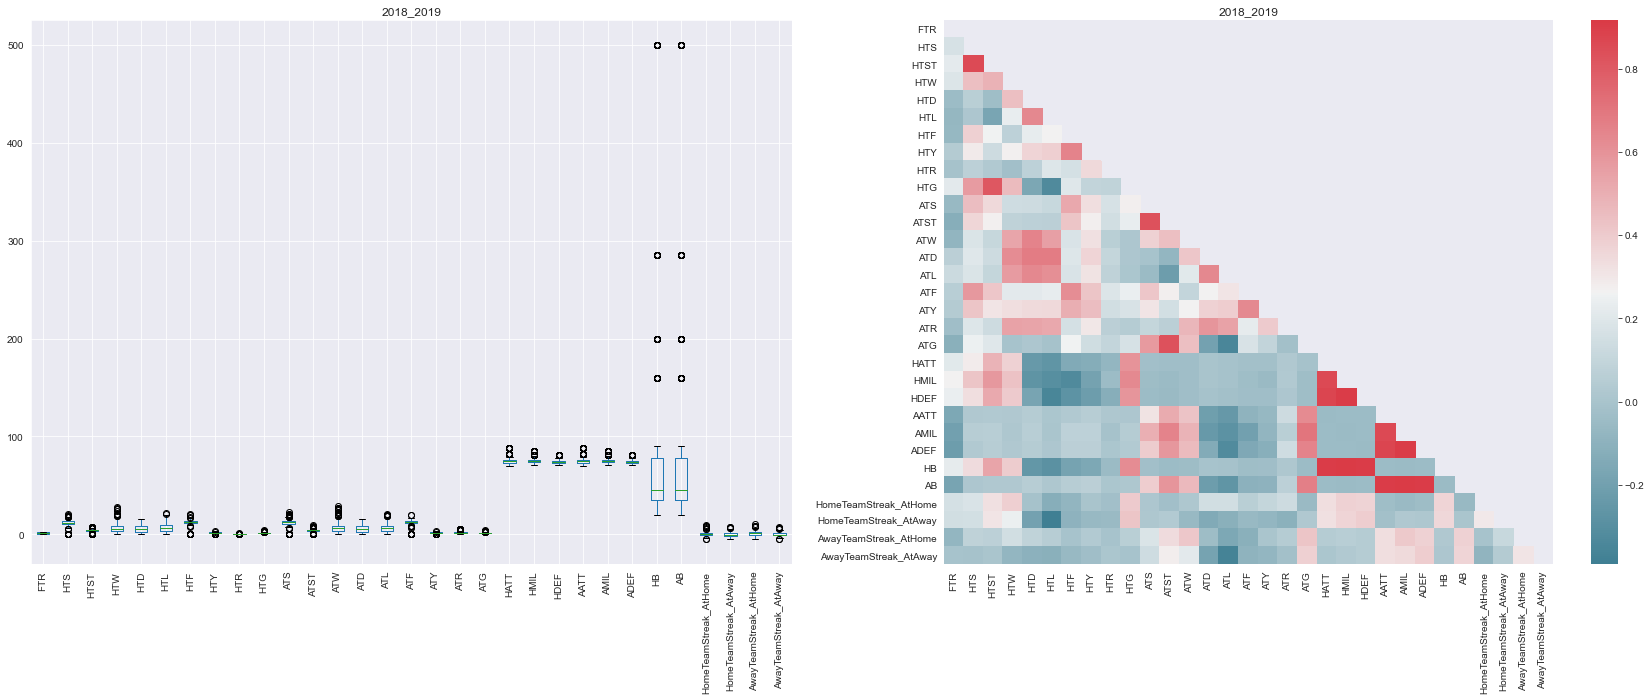

In [12]:
plt.figure(1,figsize=(30,10))
plt.subplot(121)
df.boxplot()
plt.xticks(rotation='vertical')
plt.title("2018_2019")

plt.subplot(122)
sns.set_style('darkgrid')
plt.rc('figure', figsize=[8, 6])
plt.xticks(rotation='vertical')
corr = df.corr()
plot_corr(corr)
plt.title("2018_2019")

plt.show()